# Comparing Machine Learning models in scikit-learn ([video #5](https://www.youtube.com/watch?v=0pP4EwWJgIU&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=5))

Created by [Data School](https://www.dataschool.io). Watch all 10 videos on [YouTube](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A). Download the notebooks from [GitHub](https://github.com/justmarkham/scikit-learn-videos).

**Note:** This notebook uses Python 3.9.1 and scikit-learn 0.23.2. The original notebook (shown in the video) used Python 2.7 and scikit-learn 0.16.

## Agenda

- How do I choose **which model to use** for my supervised learning task?
- How do I choose the **best tuning parameters** for that model?
- How do I estimate the **likely performance of my model** on out-of-sample data?

## Review

- Classification task: Predicting the species of an unknown iris
- Used three classification models: KNN (K=1), KNN (K=5), logistic regression
- Need a way to choose between the models

**Solution:** Model evaluation procedures

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# added empty cell so that the cell numbering matches the video

In [2]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

### Logistic regression

In [3]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [5]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


- Known as **training accuracy** when you train and test the model on the same data

### KNN (K=5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


### KNN (K=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

![Overfitting](images/05_overfitting.png)

*Image Credit: [Overfitting](https://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [8]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

![Train/test split](images/05_train_test_split.png)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [10]:
# added empty cell so that the cell numbering matches the video

In [11]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [12]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [13]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


Repeat for KNN with K=5:

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Repeat for KNN with K=1:

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Can we locate an even better value for K?

In [17]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

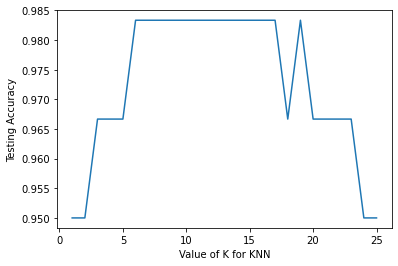

In [18]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

## Making predictions on out-of-sample data

In [19]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

## Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

## Resources

- Quora: [What is an intuitive explanation of overfitting?](https://www.quora.com/What-is-an-intuitive-explanation-of-over-fitting-particularly-with-a-small-sample-set-What-are-you-essentially-doing-by-over-fitting-How-does-the-over-promise-of-a-high-R%C2%B2-low-standard-error-occur/answer/Jessica-Su)
- Video: [Estimating prediction error](https://www.youtube.com/watch?v=ngrOYWgJjb4&list=PL5-da3qGB5IA6E6ZNXu7dp89_uv8yocmf&index=1&t=154s) (12 minutes, starting at 2:34) by Hastie and Tibshirani
- [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
    - [Guiding questions](https://github.com/justmarkham/DAT8/blob/master/homework/09_bias_variance.md) when reading this article
- Video: [Visualizing bias and variance](https://www.youtube.com/watch?v=zrEyxfl2-a8&t=1857s) (15 minutes, starting at 30:57) by Abu-Mostafa

## Comments or Questions?

- Email: <kevin@dataschool.io>
- Website: https://www.dataschool.io
- Twitter: [@justmarkham](https://twitter.com/justmarkham)

© 2021 [Data School](https://www.dataschool.io). All rights reserved.